# Correlations and linear regression

Correlation
====
We say that two variables are _correlated_ when a change in one is associated with a change in the other.

Generate some synthetic data with random noise.

In [ ]:
set.seed(6554)
x <- sample(1:20,20) + rnorm(20,sd=2)
y <- x + rnorm(20, sd=3)  # y is correlated with x
z <- sample(1:20,20)/2 + rnorm(20, sd=5)
df <- data.frame(x,y,z)

In [ ]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,3))
plot(df$x, df$y)
plot(df$x, df$z)
plot(df$y, df$z)

It appears that x and y are correlated positively, while z in not correlated with the rest.

Let's check this intuition by calculating the _Pearson correlation coefficient_. 

* values between -1 and 1.
* 1 = perfect positive correlation
* 0 = no correlation.

In [ ]:
cor(df, method="pearson")

The correlation coefficient between x and y is close to 1, and that between z and the others is small.

However, these results might be due to luck, resulting from the finite number of data we got. 

The _correlation test_ gives us a confidence interval about this result.

In [ ]:
cor.test(df$x, df$y, method="pearson")

In [ ]:
cor.test(df$x, df$z, method="pearson")

Let's apply this to a real data set, the height and weight data for men and women which we have used before.

In [ ]:
url <- "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
heights_weights_gender <- read.table(url, header=T, sep=",")
men <- heights_weights_gender$Gender == "Male"
men_heights <- heights_weights_gender[["Height"]][men]
men_weights <- heights_weights_gender[["Weight"]][men]
women <- heights_weights_gender$Gender == "Female"
women_heights <- heights_weights_gender[["Height"]][women]
women_weights <- heights_weights_gender[["Weight"]][women]

In [ ]:
cor.test(men_heights,men_weights)

In [ ]:
cor.test(women_heights,women_weights)

Correlation does not always mean causation
----
If A and B are correlated, this **might** mean there is a causal link between them
* A causes B, e.g. rain and crop growth.
* A and B influence each other; e.g., rain causes tree growth, and large forests cause rain.

However, correlation can also exist without causation.

* Both A and B are may be influenced by another factor
  
  <img src="https://images.ctfassets.net/vrkkgjbn4fsk/4jgRRfpWg8EmgIoOIWiESA/350c521581448aa5993ca54b91fdf651/1-causation-vs-correlation-germ-theory.png" width="30%">

* Pure luck, no causation.

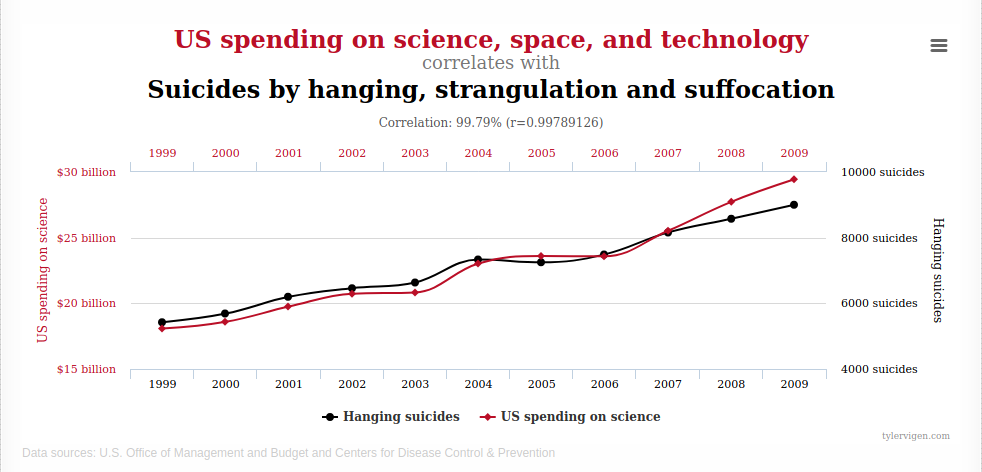
    ([Source](http://www.tylervigen.com/spurious-correlations))

# The Anscombe Quartet

Correlation is a summary statistic. It can hide important features of data.

A famous example is the _Anscombe_ data set, which illustrates that very different data can lead to the same correlation coefficient.

In [ ]:
anscombe

In [ ]:
options(repr.plot.width=10, repr.plot.height=3)
par(mfrow = c(1,4))
plot(anscombe$x1, anscombe$y1)
plot(anscombe$x2, anscombe$y2)
plot(anscombe$x3, anscombe$y3)
plot(anscombe$x4, anscombe$y4,xlim=c(4,20))

Despite fundamental differences, the correlation coefficient for each pair of variables is the same.

In [ ]:
cor(anscombe$x1, anscombe$y1)
cor(anscombe$x2, anscombe$y2)
cor(anscombe$x3, anscombe$y3)
cor(anscombe$x4, anscombe$y4)

Linear regression
====

When we discover a correlation between two variables $x$ and $y$, we may want to find out a _formula_ for the relation between them. That way, we can predict the outcome of unobserved input values.

_Assume_ a linear relationship $y=ax+b$. Then, given the observations $(x_1,y_1),\ldots,(x_n,y_n)$, the statistical procedure to determine the coefficients $a$ and $b$ is called _linear regression_.

Once we have some estimates $\hat{a}$ and $\hat{b}$ for the parameters, when we get a new input value $x$, we can predict the outcome as $y=\hat{a}x + \hat{b}$.

Let's create a synthetic data set again.

In [ ]:
set.seed(1234)
x <- 1:20 + rnorm(10,sd=2)
y <- x + rnorm(10, sd=3)  # y is correlated with x
df <- data.frame(x,y)

In [ ]:
options(repr.plot.width=5, repr.plot.height=4)
plot(x,y)

Our purpose is to draw a line such that the distances between given points and the line are minimized. R provides a function `lm()` (for "linear model") that performs this task.

In [ ]:
linmodel <- lm(y~x, data=df)
linmodel

We see a nonzero intercept, even though we expect zero. Is this a significant result?

In [ ]:
summary(linmodel)

In [ ]:
confint(linmodel)

The resulting line can be plotted with the `abline()` function.

In [ ]:
plot(x,y)
abline(linmodel, col="red")

Let's make a prediction for $x=25,26,\ldots,30$.

In [ ]:
newx <- 25:30
predict.lm(linmodel, data.frame(x=newx))

Linear regression of height and weight data
----

In [ ]:
df <- data.frame(men_heights,men_weights,women_heights,women_weights)
men_hw_model <- lm("men_weights ~ men_heights", data=df)
women_hw_model <- lm("women_weights ~ women_heights", data=df)

In [ ]:
men_hw_model

In [ ]:
plot(men_heights,men_weights)
abline(men_hw_model,col="red")

In [ ]:
women_hw_model
plot(women_heights,women_weights)
abline(women_hw_model,col="red")

Linear regression with multiple variables
----

Our linear model can involve two independent variables: 
$$y = a_0 + a_1x_1 + a_2 x_2$$

In [ ]:
set.seed(1234)
x1 <- sample(1:20,20) + rnorm(10,sd=2)
x2 <- sample(1:20,20)/2 + rnorm(20, sd=5)

y <- x1 + 2*x2 + rnorm(10, sd=3)
df <- data.frame(x,y,z)

In [ ]:
plot(df)

In [ ]:
linmodel2 <- lm(y~x1+x2, data=df)
linmodel2

# Linear regression with polynomials

Consider the following data:

In [ ]:
set.seed(8764)
x <- 0:19
y <- -0.1*x^2 + 2*x + 1 + rnorm(20, sd=2)
plot(x,y)

This model is obviously not linear in $x$. However, we can still use linear regression here. 

Create new variables: $x_1 \equiv x$ and $x_2 \equiv x^2$.

Then we can set up a linear model with two independent variables as before.

In [ ]:
x1 <- x
x2 <- x^2
quadmodel <- lm(y~x1+x2, data=data.frame(x1,x2,y))
quadmodel

The estimated model is $\hat{y} = -0.1202x^2 + 2.3705x-0.4860$, while the truth was $y=-0.1x^2 + 2x -1 $.

We cannot plot the fitted curve directly with `abline()`. Instead, we need to extract the model coefficients and set up a predictions vector with it.

In [ ]:
quadmodel$coefficients

In [ ]:
a <- quadmodel$coefficients["x1"]
b <- quadmodel$coefficients["x2"]
c <- quadmodel$coefficients["(Intercept)"]

In [ ]:
xp <- seq(0,20,length.out = 100)
yp <- a*xp + b*xp^2 + c
plot(x,y)
lines(xp,yp, col="red")

In [ ]:
summary(quadmodel)

In [ ]:
confint(quadmodel)